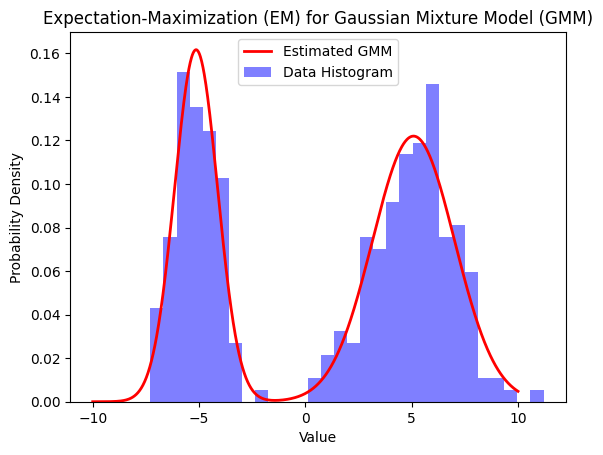

Estimated Means: [ 5.08582038 -5.13860193]
Estimated Standard Deviations: [1.93062807 1.01111145]
Estimated Weights: [0.59030554 0.40969446]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data from a mixture of two Gaussian distributions
np.random.seed(0)

# Parameters of the two Gaussian components
true_means = [-5, 5]
true_stds = [1, 2]
true_weights = [0.4, 0.6]

# Number of data points
n_samples = 300

# Generate data
data = []
for i in range(n_samples):
    component = np.random.choice([0, 1], p=true_weights)
    sample = np.random.normal(loc=true_means[component], scale=true_stds[component])
    data.append(sample)

data = np.array(data)

# EM Algorithm
def em_algorithm(data, n_components, n_iterations=100):
    n_samples = len(data)
    
    # Initialize parameters randomly
    np.random.seed(0)
    means = np.random.randn(n_components)
    stds = np.random.rand(n_components)
    weights = np.random.rand(n_components)
    weights /= weights.sum()

    for iteration in range(n_iterations):
        # E-step: Compute the responsibilities (posterior probabilities)
        responsibilities = np.zeros((n_samples, n_components))
        for i in range(n_samples):
            for j in range(n_components):
                responsibilities[i, j] = weights[j] * norm.pdf(data[i], loc=means[j], scale=stds[j])
            responsibilities[i, :] /= np.sum(responsibilities[i, :])

        # M-step: Update the parameters
        Nj = np.sum(responsibilities, axis=0)
        means = np.sum(responsibilities * data[:, np.newaxis], axis=0) / Nj
        stds = np.sqrt(np.sum(responsibilities * (data[:, np.newaxis] - means) ** 2, axis=0) / Nj)
        weights = Nj / n_samples

    return means, stds, weights

# Fit the GMM using EM
n_components = 2
estimated_means, estimated_stds, estimated_weights = em_algorithm(data, n_components)

# Plot the original data and the estimated Gaussian components
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue', label='Data Histogram')
x = np.linspace(-10, 10, 1000)
pdf = estimated_weights[0] * norm.pdf(x, loc=estimated_means[0], scale=estimated_stds[0]) + \
      estimated_weights[1] * norm.pdf(x, loc=estimated_means[1], scale=estimated_stds[1])
plt.plot(x, pdf, color='red', lw=2, label='Estimated GMM')
plt.legend()
plt.title('Expectation-Maximization (EM) for Gaussian Mixture Model (GMM)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

print("Estimated Means:", estimated_means)
print("Estimated Standard Deviations:", estimated_stds)
print("Estimated Weights:", estimated_weights)
